In [137]:
#essential libraries
import pandas as pd

#libraries to scrape data
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

#libraries for plotting
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#import libraries for plotting maps
import geopandas as gpd
import descartes as dc

In [138]:
#ignore certification errors

ctx=ssl.create_default_context()
ctx.check_hostname=False
ctx.verify_mode=ssl.CERT_NONE



In [171]:
#state to view
a=input("Enter the state: ")


Enter the state: maharashtra


In [152]:
#data scraping of the state
url='https://covidindia.org/'+a+'/'
html=urllib.request.urlopen(url).read()
soup=BeautifulSoup(html,'html.parser')

data=[]  
table = soup.find('table')
table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols[:-1] if ele]) # Get rid of empty values and not scrape active cases value

In [155]:
#the issue that we face here is that the website erratically removes the data from the active cases column. 
# For this reason, I calculate active column cases 
# active cases=total cases- recoveries-death

In [156]:
#make a dataframe 

# colo=['District','Total Cases','Recoveries','Death','Active']
colo=['District','Total Cases','Recoveries','Death']
df = pd.DataFrame(data,columns=colo)
print(df)

           District Total Cases Recoveries Death
0        Ahmednagar         586        390    16
1             Akola        1703       1224    89
2          Amravati         708        481    31
3        Aurangabad        6812       3006   301
4              Beed         149         95     3
5          Bhandara          94         78     0
6          Buldhana         318        182    13
7        Chandrapur         120         69     0
8             Dhule        1274        724    67
9        Gadchiroli          91         60     1
10           Gondia         169        105     2
11          Hingoli         297        254     1
12          Jalgaon        4473       2506   294
13            Jalna         758        397    29
14         Kolhapur         949        733    13
15            Latur         446        232    24
16      Mumbai City       85724      57152  4938
17  Mumbai suburban           0          0     0
18           Nagpur         208        139     9
19           Nanded 

In [158]:
#Convert string into int

# df[['Total Cases','Recoveries', 'Death', 'Active']] = df[['Total Cases','Recoveries', 'Death', 'Active']].astype('int')

df[['Total Cases','Recoveries', 'Death']] = df[['Total Cases','Recoveries', 'Death', ]].astype('int')
df

,District,Total Cases,Recoveries,Death
0,Ahmednagar,586,390,16
1,Akola,1703,1224,89
2,Amravati,708,481,31
3,Aurangabad,6812,3006,301
4,Beed,149,95,3
5,Bhandara,94,78,0
6,Buldhana,318,182,13
7,Chandrapur,120,69,0
8,Dhule,1274,724,67
9,Gadchiroli,91,60,1


In [211]:
#calculate active cases

df['Active']=df.apply(lambda x: (x['Total Cases']-x['Recoveries']-x['Death']), axis=1)
df

,District,Total Cases,Recoveries,Death,Active
0,Ahmednagar,586,390,16,180
1,Akola,1703,1224,89,390
2,Amravati,708,481,31,196
3,Aurangabad,6812,3006,301,3505
4,Beed,149,95,3,51
5,Bhandara,94,78,0,16
6,Buldhana,318,182,13,123
7,Chandrapur,120,69,0,51
8,Dhule,1274,724,67,483
9,Gadchiroli,91,60,1,30


In [164]:
#save csv as a dataset

# name='data_'+a+'.csv'
# df.to_csv(name,index=False) 

In [165]:
#total counts of every group

Total = pd.Series([df['Total Cases'].sum(),df['Recoveries'].sum(),df['Death'].sum(),df['Active'].sum()] , index =['Total Cases','Recoveries','Death','Active']) 
# Total.loc['Recoveries']
Total

Total Cases    211987
Recoveries     115262
Death            9026
Active          87699
dtype: int64

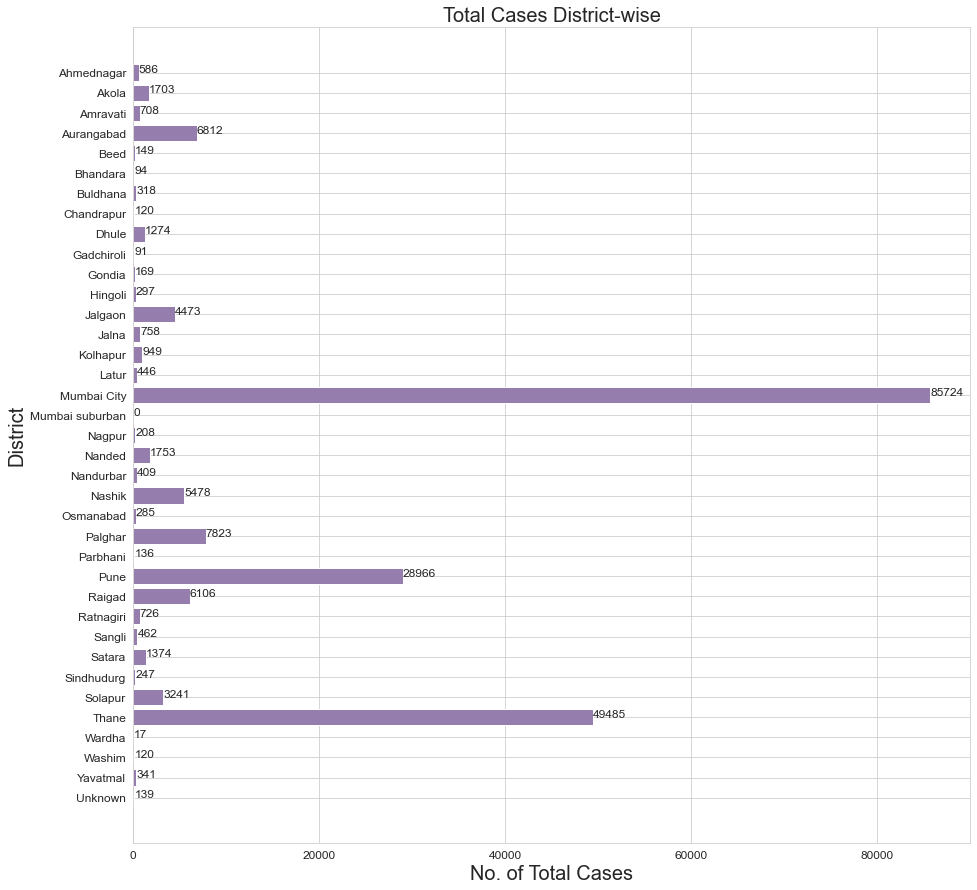

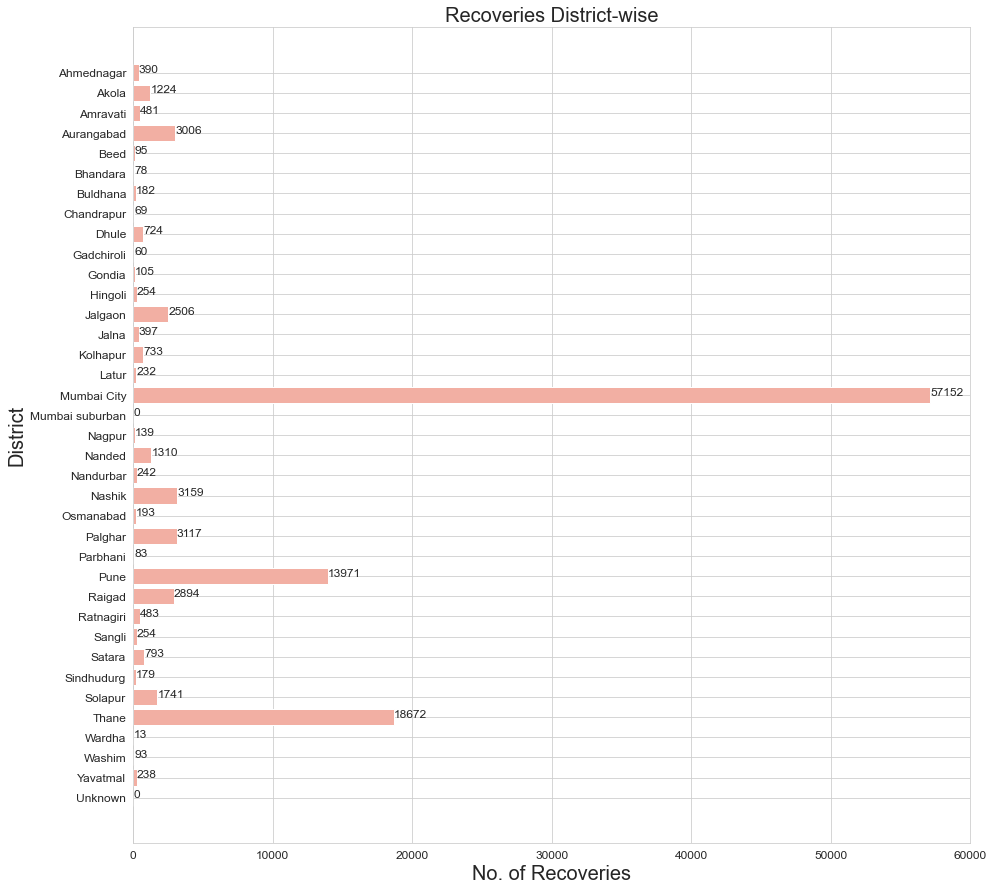

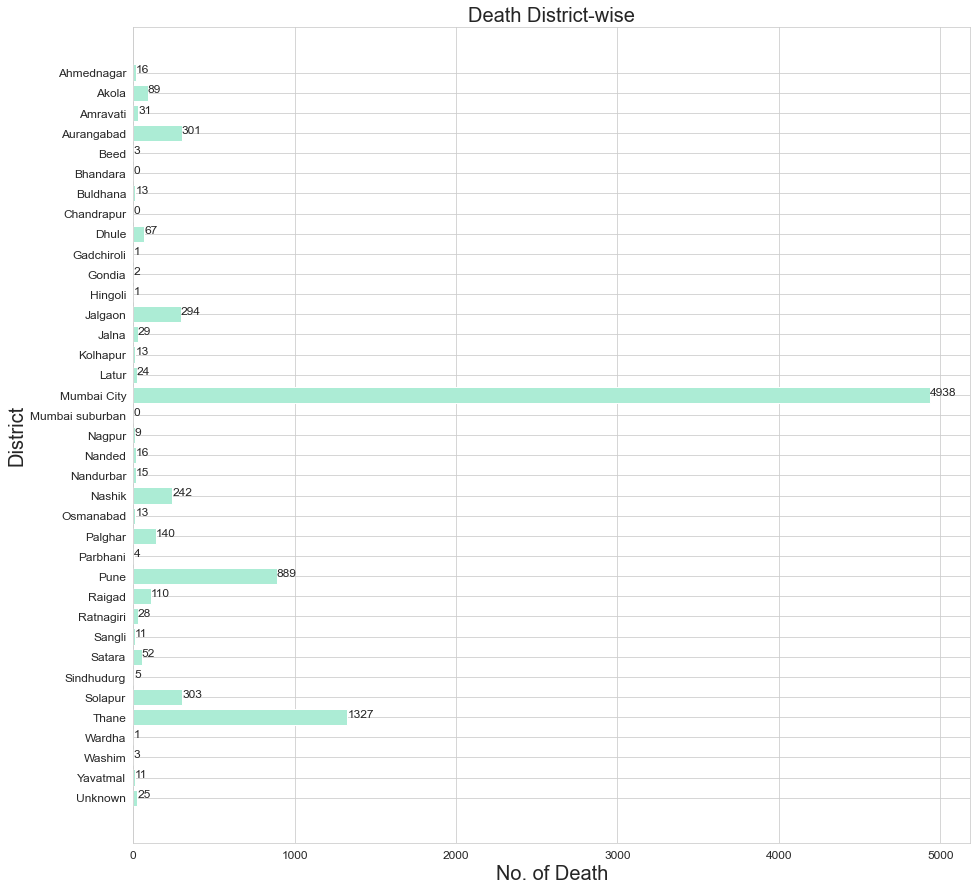

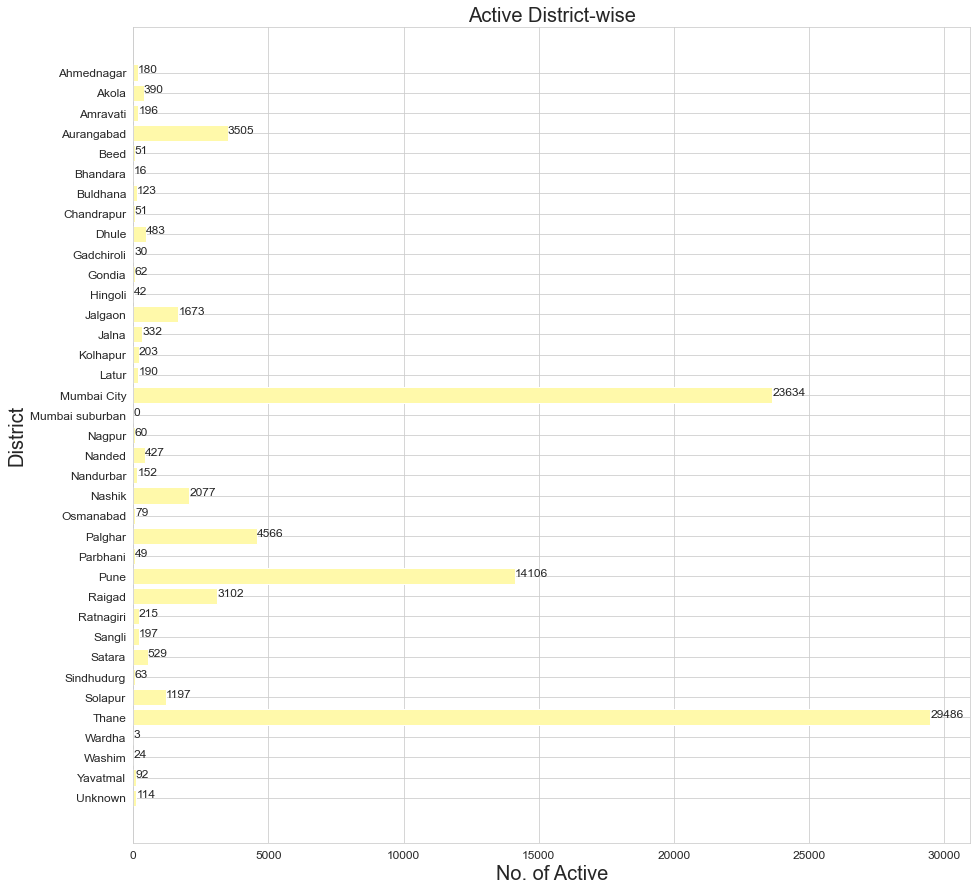

In [166]:
#bar chart
sns.set_style("whitegrid")
for i,j in zip(['Total Cases','Recoveries','Death','Active'],['#957DAD','#F2AFA3','#ACECD5','#FFF9AA']):
    plt.figure(figsize = (15,15))
    plt.barh(df['District'],    df[i],align = 'center', color = j)
    plt.xlabel(('No. of '+i), fontsize = 20)
    plt.ylabel('District', fontsize = 20)
    plt.gca().invert_yaxis()
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title((i+' District-wise'), fontsize = 20 )
    for index, value in enumerate(df[i]):
        plt.text(value, index, str(value), fontsize = 12)
    plt.show()

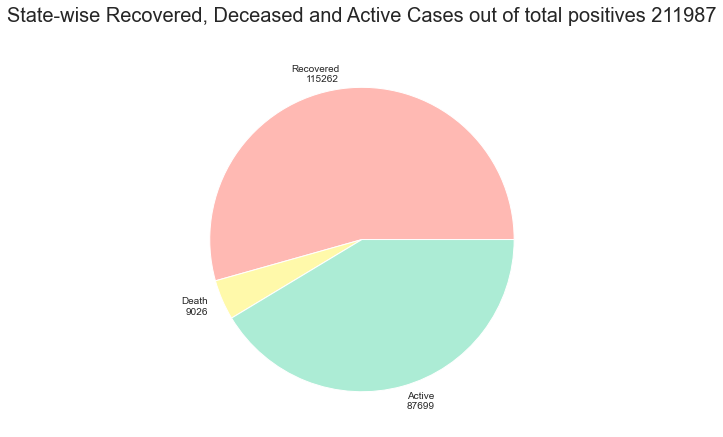

In [167]:
# Pie Chart — Statewise total Confirmed, Recovered and Deceased cases

# df['Total Cases'].sum(),
# 'Total Cases\n' + str(df['Total Cases'].sum()),

class_sum =[df['Recoveries'].sum(),df['Death'].sum(),df['Active'].sum()]
class_labels = ['Recovered\n' + str(df['Recoveries'].sum()),
                'Death\n' + str(df['Death'].sum()), 'Active\n' + str(df['Active'].sum())]
custom_colors = ['#FFB9B3','#FFF9AA','#ACECD5']
plt.figure(figsize = (7,7))
plt.pie(class_sum, labels = class_labels,colors = custom_colors)
plt.rc('font',size=16)
plt.title(('State-wise Recovered, Deceased and Active Cases out of total positives '+ str(df['Total Cases'].sum())+'\n'), fontsize = 20)
plt.show()

In [159]:
# # reading the shape file of map of India in GeoDataFrame
# map_data = gpd.read_file('Indian_States.shp')
# map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
# map_data.head()

In [265]:
# data cleaning before using state name to make compatible with map

print(a)

#replacing hiphen in user entered state name by space
if('-' in a):
    a=a.replace('-',' ')
    
print(a)

maharashtra
maharashtra


In [266]:
# reading the shape file of map of India in GeoDataFrame
map_data = gpd.read_file('shapefile/India_Assembly.shp')
map_data.rename(columns = {'dist_name':'District'}, inplace = True)
map_data['st_name']=map_data['st_name'].str.lower()
map_data.head()

,objectid,st_code,st_name,dt_code,District,ac_no,ac_name,pc_no,pc_name,pc_id,status,shape_leng,shape_area,geometry
0,1,13,nagaland,1,MON,41,Tizit,1,NAGALAND,1301,Pre delimitation,1.38185405314,0.05584479387,"POLYGON ((94.94575 26.93518, 94.95510 26.93975..."
1,1,13,nagaland,1,MON,43,Tapi,1,NAGALAND,1301,Pre delimitation,1.05615692627,0.03038727861,"POLYGON ((95.22324 26.75964, 95.21760 26.75589..."
2,1,13,nagaland,1,MON,42,Wakching,1,NAGALAND,1301,Pre delimitation,0.98030324467,0.01882835726,"POLYGON ((94.86775 26.82831, 94.87219 26.82334..."
3,1,13,nagaland,2,TUENSANG,49,Tamlu,1,NAGALAND,1301,Pre delimitation,1.13329626994,0.02189855907,"POLYGON ((94.73863 26.76868, 94.74029 26.77594..."
4,1,13,nagaland,3,MOKOKCHUNG,21,Tuli,1,NAGALAND,1301,Pre delimitation,0.96598888462,0.02239653004,"POLYGON ((94.73863 26.76868, 94.73627 26.74956..."


In [267]:
#filter out assemblies of the state
map_data=map_data[map_data['st_name'] == a]
map_data.head()

,objectid,st_code,st_name,dt_code,District,ac_no,ac_name,pc_no,pc_name,pc_id,status,shape_leng,shape_area,geometry
340,28,27,maharashtra,22,MUMBAI (SUBURBAN) *,169,Ghatkopar West,28,MUMBAI NORTH-EAST,2728,None,0.12719212323,0.00062549105,"POLYGON ((72.91476 19.09837, 72.92517 19.08867..."
509,0,27,maharashtra,22,MUMBAI (SUBURBAN) *,0,None,0,None,2700,None,0.21892088066,0.00231788207,"POLYGON ((72.97657 19.04667, 72.97496 19.02999..."
2327,13,27,maharashtra,13,CHANDRAPUR,71,Chandrapur (SC),13,CHANDRAPUR,2713,None,0.87741625529,0.023413534,"POLYGON ((79.26193 20.03402, 79.26259 20.01935..."
2331,26,27,maharashtra,22,MUMBAI (SUBURBAN) *,152,Borivali,26,MUMBAI NORTH,2726,None,0.28471713664,0.00304725966,"POLYGON ((72.78429 19.26279, 72.78424 19.26374..."
2336,26,27,maharashtra,22,MUMBAI (SUBURBAN) *,162,Malad West,26,MUMBAI NORTH,2726,None,0.23531746288,0.00208271121,"POLYGON ((72.84848 19.19039, 72.84803 19.17206..."


In [268]:
#check type of map_data
type(map_data)

#here its a dataframe

geopandas.geodataframe.GeoDataFrame

In [269]:
# separate only the needed columns - district and geometry 
map_data=map_data[['District','geometry']]

# capitalize district to match the scraped data-set
# doing this step here, because once dissolved in the next step, can't be operatd the same way
map_data['District']=map_data['District'].str.capitalize() 
map_data['District']=map_data['District'].str.replace('*','')
map_data['District']=map_data['District'].str.replace('(','')
map_data['District']=map_data['District'].str.replace(')','')
map_data

,District,geometry
340,Mumbai suburban,"POLYGON ((72.91476 19.09837, 72.92517 19.08867..."
509,Mumbai suburban,"POLYGON ((72.97657 19.04667, 72.97496 19.02999..."
2327,Chandrapur,"POLYGON ((79.26193 20.03402, 79.26259 20.01935..."
2331,Mumbai suburban,"POLYGON ((72.78429 19.26279, 72.78424 19.26374..."
2336,Mumbai suburban,"POLYGON ((72.84848 19.19039, 72.84803 19.17206..."
...,...,...
3066,Sindhudurg,"POLYGON ((73.74807 16.60068, 73.76824 16.60269..."
3067,Kolhapur,"POLYGON ((73.98684 16.63037, 74.00112 16.62337..."
3068,Sindhudurg,"POLYGON ((73.59567 16.29395, 73.59760 16.26570..."
3069,Kolhapur,"POLYGON ((74.49661 16.23354, 74.50341 16.22408..."


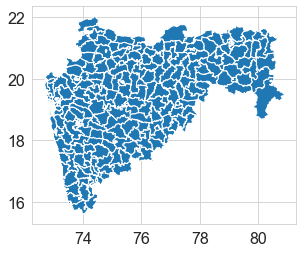

In [270]:
# check the map
map_data.plot()

#the map is divided by assemblies, we need it divided by districts. so we dissolve by Districs

In [274]:
# select the columns that we will dissolve and that will be retained
assem_boundary = map_data[['District', 'geometry']]

# dissolve the district by region 
map_data = assem_boundary.dissolve(by='District')

# view the resulting geodataframe
map_data

,geometry
District,
Ahmadnagar,"POLYGON ((74.97341 18.82872, 74.97071 18.81436..."
Akola,"POLYGON ((76.71948 20.91769, 76.74498 20.92883..."
Amravati,"POLYGON ((78.16034 20.94545, 78.17015 20.93909..."
Aurangabad,"POLYGON ((75.63374 19.80756, 75.64153 19.79256..."
Bhandara,"POLYGON ((79.75640 20.73096, 79.75243 20.71681..."
Bid,"POLYGON ((76.33892 19.09852, 76.34881 19.09847..."
Buldana,"POLYGON ((76.69841 20.45646, 76.71061 20.44069..."
Chandrapur,"POLYGON ((79.74582 19.78276, 79.75375 19.75726..."
Dhule,"POLYGON ((74.86701 21.07339, 74.85804 21.06325..."


In [259]:
map_data.dtypes

#it's a series

geometry    geometry
dtype: object

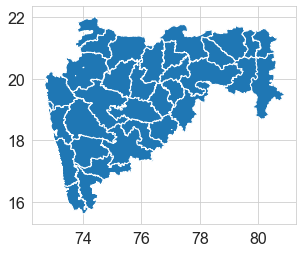

In [260]:
#check the map(should be divided by districts)
map_data.plot()

In [261]:
# data cleaning before merging

#creating a copy of scraped dataframe
dt=df

#renaming cities like Mumbai (City) as Mumbai city
dt['District']=dt['District'].str.replace('(','')
dt['District']=dt['District'].str.replace(')','')
dt['District']=dt['District'].str.capitalize()
print(dt['District'])


0          Ahmednagar
1               Akola
2            Amravati
3          Aurangabad
4                Beed
5            Bhandara
6            Buldhana
7          Chandrapur
8               Dhule
9          Gadchiroli
10             Gondia
11            Hingoli
12            Jalgaon
13              Jalna
14           Kolhapur
15              Latur
16        Mumbai city
17    Mumbai suburban
18             Nagpur
19             Nanded
20          Nandurbar
21             Nashik
22          Osmanabad
23            Palghar
24           Parbhani
25               Pune
26             Raigad
27          Ratnagiri
28             Sangli
29             Satara
30         Sindhudurg
31            Solapur
32              Thane
33             Wardha
34             Washim
35           Yavatmal
36            Unknown
Name: District, dtype: object


In [262]:
#Merge the two dataframes state_data and map_data on States/UT names —
merged_data = pd.merge(map_data, dt, 
                       how = 'left', on = 'District')
merged_data.fillna(0, inplace = True)
# merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data

,District,geometry,Total Cases,Recoveries,Death,Active
0,Ahmadnagar,"POLYGON ((74.97341 18.82872, 74.97071 18.81436...",0.0,0.0,0.0,0.0
1,Akola,"POLYGON ((76.71948 20.91769, 76.74498 20.92883...",1703.0,1224.0,89.0,390.0
2,Amravati,"POLYGON ((78.16034 20.94545, 78.17015 20.93909...",708.0,481.0,31.0,196.0
3,Aurangabad,"POLYGON ((75.63374 19.80756, 75.64153 19.79256...",6812.0,3006.0,301.0,3505.0
4,Bhandara,"POLYGON ((79.75640 20.73096, 79.75243 20.71681...",94.0,78.0,0.0,16.0
5,Bid,"POLYGON ((76.33892 19.09852, 76.34881 19.09847...",0.0,0.0,0.0,0.0
6,Buldana,"POLYGON ((76.69841 20.45646, 76.71061 20.44069...",0.0,0.0,0.0,0.0
7,Chandrapur,"POLYGON ((79.74582 19.78276, 79.75375 19.75726...",120.0,69.0,0.0,51.0
8,Dhule,"POLYGON ((74.86701 21.07339, 74.85804 21.06325...",1274.0,724.0,67.0,483.0
9,Gadchiroli,"POLYGON ((80.54332 20.01219, 80.54983 20.00068...",91.0,60.0,1.0,30.0


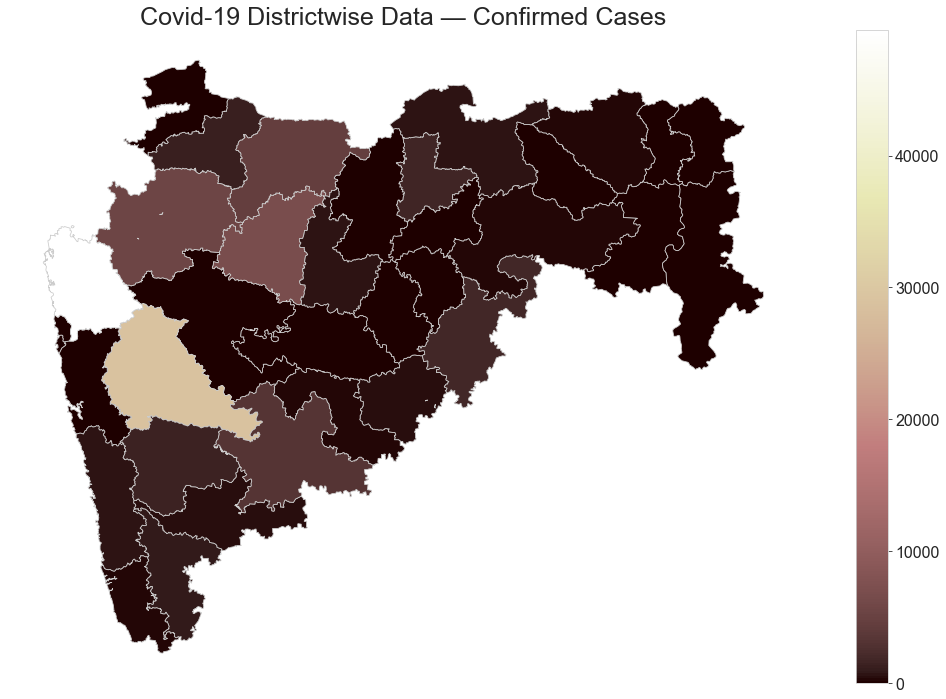

In [263]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Districtwise Data — Confirmed Cases', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Total Cases', cmap='pink', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
plt.show()

Enter a date in dd/mm/yyyy format04/09/1998
21 years
